## Homer motif analysis

This notebook is meant to visualize the most enriched motifs in differential Cebpd peaks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn import linear_model
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import rpy2
%load_ext rpy2.ipython
import glob
import os

### Cebpd UP peaks

In [2]:
df = pd.read_csv('data/homer/cop1_ko_cebpd_up_peaks/knownResults.txt', sep='\t')

# log p-values
df['-log10(p-value)'] = -np.log10(df['P-value'])

# CEBP lost numerical precision
df.loc[0, '-log10(p-value)'] = 344

# format TF name
df['TF'] = df['Motif Name'].str.split('/', expand=True)[0].str.split('(', expand=True)[0]

df.head(10)

/Users/ctokheim/conda/envs/data_analysis2/lib/python3.7/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif(of 1370),% of Target Sequences with Motif,# of Background Sequences with Motif(of 48471),% of Background Sequences with Motif,-log10(p-value),TF
0,CEBP(bZIP)/ThioMac-CEBPb-ChIP-Seq(GSE21512)/Homer,ATTGCGCAAC,0.000000e+00,-793.9,0.0,842.0,61.46%,7076.7,14.60%,344.0,CEBP
1,NFIL3(bZIP)/HepG2-NFIL3-ChIP-Seq(Encode)/Homer,VTTACGTAAYNNNNN,1.000000e-235,-542.0,0.0,713.0,52.04%,6946.7,14.33%,235.0,NFIL3
2,HLF(bZIP)/HSC-HLF.Flag-ChIP-Seq(GSE69817)/Homer,RTTATGYAAB,1.000000e-171,-395.6,0.0,727.0,53.07%,9269.8,19.13%,171.0,HLF
3,Fos(bZIP)/TSC-Fos-ChIP-Seq(GSE110950)/Homer,NDATGASTCAYN,1.000000e-143,-329.4,0.0,560.0,40.88%,6341.5,13.08%,143.0,Fos
4,Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,DATGASTCATHN,1.000000e-141,-325.9,0.0,593.0,43.28%,7139.2,14.73%,141.0,Atf3
5,AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,VTGACTCATC,1.000000e-140,-324.2,0.0,630.0,45.99%,8042.4,16.59%,140.0,AP-1
6,Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,NNATGASTCATH,1.000000e-138,-318.3,0.0,536.0,39.12%,5976.3,12.33%,138.0,Fra1
7,Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer,GGATGACTCATC,1.000000e-132,-304.4,0.0,478.0,34.89%,4947.8,10.21%,132.0,Fra2
8,JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE360...,RATGASTCAT,1.000000e-128,-296.3,0.0,516.0,37.66%,5859.4,12.09%,128.0,JunB
9,BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,DATGASTCAT,1.000000e-128,-296.1,0.0,571.0,41.68%,7104.6,14.66%,128.0,BATF


/Users/ctokheim/conda/envs/data_analysis2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


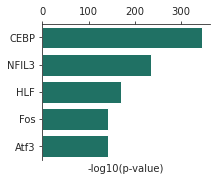

In [3]:
tmp = df.head(5).copy()
with sns.axes_style('ticks'):
    ax = sns.barplot(tmp['-log10(p-value)'].head(5), tmp['TF'].head(5), color=sns.xkcd_rgb['blue green'])
    plt.ylabel('')
    sns.despine(bottom=True, top=False)
    ax.xaxis.set_ticks_position('top')
    plt.gcf().set_size_inches(3, 2.5)
    #plt.savefig('figures/up_cebpd_peak_homer_motif_enrichment_v4.pdf')

### Cebpd down peaks

In [4]:
df = pd.read_csv('data/homer/cop1_ko_cebpd_down_peaks/knownResults.txt', sep='\t')

# log p-values
df['-log10(p-value)'] = -np.log10(df['P-value'])

# CEBP lost numerical precision
#df.loc[0, '-log10(p-value)'] = 344

# format TF name
df['TF'] = df['Motif Name'].str.split('/', expand=True)[0].str.split('(', expand=True)[0]

df.head(10)

,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif(of 691),% of Target Sequences with Motif,# of Background Sequences with Motif(of 48801),% of Background Sequences with Motif,-log10(p-value),TF
0,Fos(bZIP)/TSC-Fos-ChIP-Seq(GSE110950)/Homer,NDATGASTCAYN,1.000000e-74,-172.1,0.0,277.0,40.09%,6022.0,12.34%,74.0,Fos
1,AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,VTGACTCATC,1.000000e-71,-165.5,0.0,306.0,44.28%,7524.9,15.41%,71.0,AP-1
2,BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,DATGASTCAT,1.000000e-71,-163.8,0.0,287.0,41.53%,6702.8,13.73%,71.0,BATF
3,Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,NNATGASTCATH,1.000000e-70,-163.0,0.0,263.0,38.06%,5675.2,11.62%,70.0,Fra1
4,Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,DATGASTCATHN,1.000000e-70,-162.8,0.0,287.0,41.53%,6731.0,13.79%,70.0,Atf3
5,JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE360...,RATGASTCAT,1.000000e-68,-156.6,0.0,256.0,37.05%,5556.0,11.38%,68.0,JunB
6,Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer,GGATGACTCATC,1.000000e-63,-145.8,0.0,228.0,33.00%,4692.9,9.61%,63.0,Fra2
7,Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer,NATGASTCABNN,1.000000e-60,-139.2,0.0,183.0,26.48%,3151.0,6.45%,60.0,Fosl2
8,CEBP(bZIP)/ThioMac-CEBPb-ChIP-Seq(GSE21512)/Homer,ATTGCGCAAC,1.000000e-54,-125.8,0.0,261.0,37.77%,6739.9,13.81%,54.0,CEBP
9,Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer,GATGASTCATCN,1.000000e-49,-113.1,0.0,138.0,19.97%,2155.9,4.42%,49.0,Jun-AP1


/Users/ctokheim/conda/envs/data_analysis2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


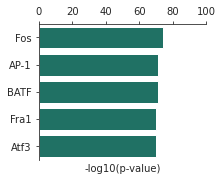

In [5]:
tmp = df.head(5).copy()
with sns.axes_style('ticks'):
    ax = sns.barplot(tmp['-log10(p-value)'].head(5), tmp['TF'].head(5), color=sns.xkcd_rgb['blue green'])
    plt.ylabel('')
    sns.despine(bottom=True, top=False)
    ax.xaxis.set_ticks_position('top')
    plt.gcf().set_size_inches(3, 2.5)
    plt.xlim(0, 100)
    #plt.savefig('figures/down_cebpd_peak_homer_motif_enrichment_v4.pdf')